# Quantum SVM


In [1]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [2]:
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm_clf = Pipeline(
    [
        ('scaler', StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss='hinge'))
    ]
)

svm_clf.fit(X_train, y_train)

,steps,"[('scaler', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [3]:
print(f"Test acc: {svm_clf.score(X_test, y_test):.2f}")

Test acc: 1.00


/var/folders/53/b8z3c5xs0l51w2mzflnyk6400000gn/T/ipykernel_17702/3794771256.py:17: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(XX, YY, Z, color='k', levels=[-1,0,1], linestyles=['--','-','--'])


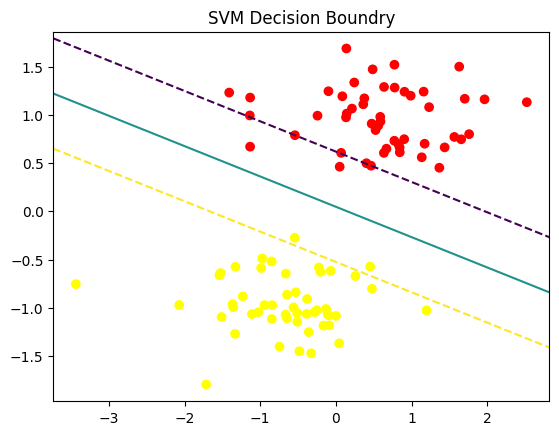

In [6]:
def plot_svm_pipeline(pipeline, X, y):
    scaler = pipeline.named_steps['scaler']
    svc = pipeline.named_steps['linear_svc']
    X_scaled = scaler.transform(X)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
    ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, color='k', levels=[-1,0,1], linestyles=['--','-','--'])

    plt.title("SVM Decision Boundry")
    plt.show()

plot_svm_pipeline(svm_clf, X, y)

## Kernel trick

$$ K(x,x') = <\phi(x), \phi(x')>$$

- x, x' wektory wejściowe z oryginalnej przestrzeni
- $\phi(x)$ odwzorowanie do przestrzeni o wyższym wymiarze
- $K(x, x')$ funkcja jądrowa - kernel function - oblicza iloczy skalarny w zadanej przestrzeni.

1. Linear - $K(x, x') = x^{T}x'$
2. Polynomial - $K(x,x') = (x^{T}x' +c)^d$
3. RBF - $K(x,x') = exp(-\gamma \, |x-x'|^2)$



In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.svm import SVC

X,y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=44)

poly_svm_clf = Pipeline([
    ('polu_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss='hinge'))
])

poly_svm_clf.fit(X_train, y_train)

/Users/seba/Documents/GitHub/qml2025/venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('polu_features', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [13]:
print(f"Test acc: {poly_svm_clf.score(X_test, y_test):.2f}")

Test acc: 0.88


In [15]:
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in classical_kernels:
    classical_svc = SVC(kernel=kernel, decision_function_shape='ovr', degree=3)
    classical_svc.fit(X_train, y_train)
    classical_score = classical_svc.score(X_test, y_test)

    print(f"{kernel} kernel classfication test score: {classical_score:.2f}")

linear kernel classfication test score: 0.83
poly kernel classfication test score: 0.87
rbf kernel classfication test score: 0.97
sigmoid kernel classfication test score: 0.70


In [18]:
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

In [19]:
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

In [22]:
def plot_decision_boundry(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min(), X[:, 0].max()+1
    y_min, y_max = X[:, 1].min(), X[:, 1].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

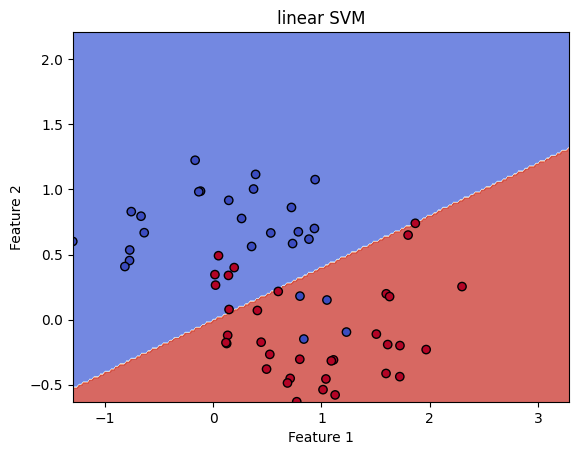

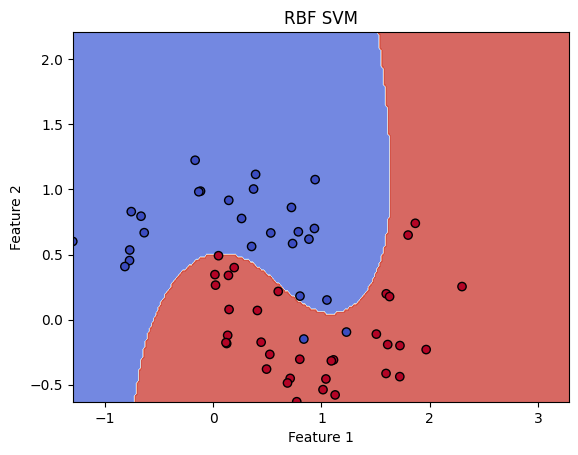

In [23]:
plot_decision_boundry(linear_svm, X_test, y_test, "linear SVM")
plot_decision_boundry(rbf_svm, X_test, y_test, "RBF SVM")

## Quantum Embedding

Kwantowy Embedding reprezentuje klasyczne dane jako stan (wektor) w przestrzeni Hilberta. 
Odwzorowanie, które generuje embedding nazywamy quantum feature map. 

In [24]:
import pennylane as qml
from pennylane.templates import AngleEmbedding

In [25]:
X[:10], y[:10]

(array([[-1.10689665e+00,  4.22928095e-02],
        [ 9.56799641e-01,  4.56750492e-01],
        [ 7.33516277e-01,  5.84617437e-01],
        [ 1.11140659e+00, -3.09213987e-01],
        [ 2.09081764e-01,  6.56679495e-04],
        [ 3.92205613e-01,  3.20238629e-01],
        [-7.56185073e-01,  8.29954942e-01],
        [ 1.50692319e+00, -1.11129319e-01],
        [ 2.04279588e+00, -3.79762883e-02],
        [ 1.44143707e-01,  9.16713583e-01]]),
 array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0]))

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, np.pi))
X_scaled = scaler.fit_transform(X)

y_scaled = 2 * y -1 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

In [27]:
X_train[:10], y_train[:10]

(array([[0.96635458, 0.84569653],
        [0.94128661, 2.08194611],
        [1.96499609, 1.93186962],
        [0.59918183, 2.22652502],
        [1.3209304 , 1.52461956],
        [1.89947175, 1.87042604],
        [1.55502562, 2.62523182],
        [2.92914352, 1.01708402],
        [2.73147861, 1.83725222],
        [1.3509262 , 1.17853671]]),
 array([ 1, -1, -1, -1,  1, -1, -1,  1,  1,  1]))

In [28]:
n_qubits = len(X_train[0])
n_qubits

2